In [1]:
#Comparing DamNet to the National Fish Barrier Dataset

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option('display.max_columns',None)

In [28]:
NABD = pd.read_csv(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\FigureFiles\NABD_fish_barriers_2012.csv")
DamNet = pd.read_csv(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\OutputsDamNet1107\NIDsMappedInBasins_MedRes_final_py.csv")

NID = pd.read_csv(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\FinalInputFiles\NID2024.csv",header=1, low_memory=False)
spatialedits = pd.read_csv(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\FinalInputFiles\NID_spatialEdits.csv")

NHD = pd.read_csv(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\FinalInputFiles\NHD_Flowline_Network_countriesOut.csv")

C:\Users\ahurst\AppData\Local\Temp\1\ipykernel_28552\2954575927.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  NABD = pd.read_csv(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\FigureFiles\NABD_fish_barriers_2012.csv")
C:\Users\ahurst\AppData\Local\Temp\1\ipykernel_28552\2954575927.py:7: DtypeWarning: Columns (135) have mixed types. Specify dtype option on import or set low_memory=False.
  NHD = pd.read_csv(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\FinalInputFiles\NHD_Flowline_Network_countriesOut.csv")


In [29]:
print('Length of NABD:',len(NABD))
print('Length of DamNet:',len(DamNet))

Length of NABD: 52456
Length of DamNet: 57454


In [65]:
# Assuming NABD and DamNet are your DataFrames
# Perform a left join and filter the rows where there is no match in DamNet
result = pd.merge(NABD, DamNet, how='left', left_on = 'NIDID', right_on ='NID', indicator=True)
result = result[result['_merge'] == 'left_only']

# Drop the indicator column and any other columns from DamNet if needed
result = result.drop(columns=['_merge'])

In [66]:
print("Number in NABD not in DamNet:",len(result))

Number in NABD not in DamNet: 9181


In [67]:
#How many of those that weren't in DamNet were not in NID2024
xref_NID = pd.merge(result,NID,how='left',left_on='NIDID',right_on='NID ID',indicator=True)
xref_NID = xref_NID[xref_NID['_merge'] == 'left_only']

xref_NID = xref_NID.drop(columns=['_merge'])

In [68]:
print("Number missing from DamNet that were not in NID 2024:", len(xref_NID))

Number missing from DamNet that were not in NID 2024: 4123


In [69]:
#How many of those not it DamNet were in our removed dams file for some reason
removed = spatialedits[spatialedits['Deleted']==1]

rem_NABD = pd.merge(result,removed,how='inner',left_on = 'NIDID',right_on='NID_ID', indicator = True)
# rem_NABD = rem_NABD[rem_NABD['_merge'] == 'left_only']

In [70]:
print("Number missing from DamNet that were purposefully removed:", len(rem_NABD))

Number missing from DamNet that were purposefully removed: 67


In [71]:
#join NABD to NHD to get DivDASqKM for NABD
NABD_NHD = pd.merge(NABD,NHD[['COMID','DivDASqKM']],how='inner',on = 'COMID')


#perform an inner join to only have the match between NABD and DamNet
plot = pd.merge(NABD_NHD,DamNet,how='inner',left_on = 'NIDID',right_on='NID')

In [72]:
print('Number in NABD that do not have a match by COMID in NHD:',len(NABD)-len(NABD_NHD))

Number in NABD that do not have a match by COMID in NHD: 2015


In [73]:
len(plot)

42870

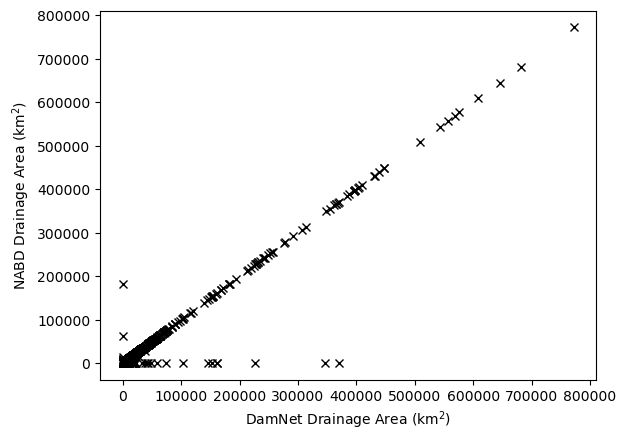

In [74]:
plt.plot(plot['DivDASqKM_y'],plot['DivDASqKM_x'],'x',color='black')
plt.xlabel('DamNet Drainage Area (km$^2$)')
plt.ylabel('NABD Drainage Area (km$^2$)')

plt.savefig(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\Figures\NABD_vs_DamNet.png",bbox_inches='tight')

In [75]:
print('Number of DamNet with DA < 1 sq.km. (none have 0):',len(plot[plot['DivDASqKM_y']<1]))
print('Number of NABD with DA < 1 sq.km.:',len(plot[plot['DivDASqKM_x']<1]))
print('Number of NABD with DA = 0 sq.km.:',len(plot[plot['DivDASqKM_x']==0]))

Number of DamNet with DA < 1 sq.km. (none have 0): 4265
Number of NABD with DA < 1 sq.km.: 3359
Number of NABD with DA = 0 sq.km.: 54


In [77]:
nomatch = plot[((plot['DivDASqKM_x']-plot['DivDASqKM_y'])/plot['DivDASqKM_x'])>0.1]
print('Number with DA greater than 10% different:',len(nomatch))

Number with DA greater than 10% different: 9125


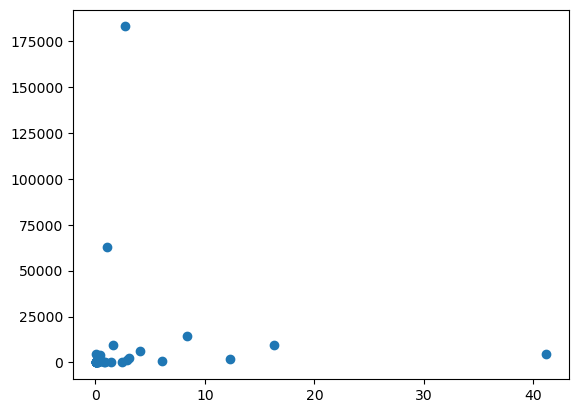

In [78]:
NABD_bigger = plot[0.01*(plot['DivDASqKM_x'])>plot['DivDASqKM_y']]
# NABD_bigger[NABD_bigger['DivDASqKM_x']>100000]

plt.plot(NABD_bigger['DivDASqKM_y'],NABD_bigger['DivDASqKM_x'],'o')

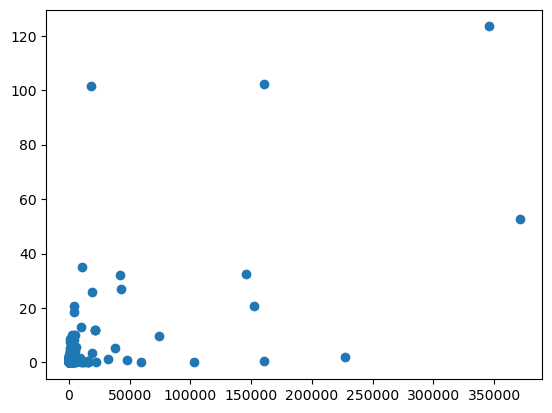

In [79]:
DamNet_bigger = plot[0.01*(plot['DivDASqKM_y'])>plot['DivDASqKM_x']]

plt.plot(DamNet_bigger['DivDASqKM_y'], DamNet_bigger['DivDASqKM_x'],'o')


# plt.plot(DamNet_bigger['DivDASqKM_y'],DamNet_bigger['DivDASqKM_x'],'o')

In [80]:
NABD_bigger[NABD_bigger['DivDASqKM_x']>50000]

,COMMENT,NIDID,COMID_x,UNIQUE_STR,newX,newY,RecordID,Dam_name,Dam_former,STATEID,Section,County,River,City,Distance,Owner_name,Owner_type,Dam_type,Core,Foundation,Purposes,Year_compl,Year_modif,Dam_length,Dam_height,NID_height,Hazard,EAP,Inspection,Outlet_gat,Volume,State_x,Dam_Name2,Designer,Private,Str_Height,Hyd_Height,Max_Disch,Max_stor,Norm_stor,NID_stor,Surf_area,Drain_area,Insp_Freq,St_reg,St_reg_ag,Spill_type,Num_locks,Len_locks,Wid_locks,Source,Condition,Cond_Date,Cond_desc,Spill_wid,DivDASqKM_x,Unnamed: 0,Dam_Name,ShortID,NID,GRanD_ID,IsSite,IsUSBR,IsUSACE,IsGRanD,State_y,OwnerTypes,PrimaryPur,IsRiverMth,delta,IsLock,yrc,yrr,yrc_source,MaxStor_m3,StorSource,Dam_Len_m,DamH_m,Longitude,Latitude,COMID_y,DivDASqKM_y,Moved,FromDam,ToDam,flag,countryOut,SiteTag,GRanDTag,RiverTag,DeltaTag
1134,8,AL02536,19626226.0,1303,-86.392906,34.422482,2245.0,Guntersville Backwater Dike,,,,Marshall,Tennessee River,Guntersville,0.1,TVA,F,RE,XEK,S,C,1937.0,,12585.0,35.0,39.0,H,Y,03/03/2003,X,1135090.0,AL,Guntersville Lake,TVA,N,39.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,N,,N,0.0,0.0,0.0,AL,,,,0.0,62898.0669,38254,Richard Cribbs,287124.0,AL02536,NaN,0.0,0.0,0.0,0.0,Alabama,Private,Fish and Wildlife Pond,0.0,0.0,0.0,1998.0,0,NID,275201.7228,NID,205.740,5.48640,-87.114494,31.959249,21459134,1.0233,0.0,NaN,123196.0,"[0, 9]",5,123196,0,-1,24
28639,8,OH03032,1922930.0,34279,-84.171563,38.794957,56429.0,EQUINUS (LEGENDARY RUN) LAKE DAM,,9042-023,PIERCE,CLERMONT,TRIBUTARY TO NINEMILE CREEK,Cincinnati,2.8,McCaw Investments,P,RC,,,SO,2001.0,,280.0,45.3,45.3,H,Y,8/27/2007,X,42000.0,OH,,"WOOLPERT LLP, CINCINNATI",,0.0,0.0,1689.0,78.0,49.0,78.0,0.0,109.0,0.0,Y,,U,0.0,0.0,0.0,OH,SATISFACTORY,7/1/2008,Meets applicable hydrologic and seismic regula...,0.0,182970.8370,23640,Equinus (Legendary Run) Lake Dam,344303.0,OH03032,NaN,0.0,0.0,0.0,0.0,Ohio,Private,Other,0.0,0.0,0.0,2001.0,0,NID,96211.4400,NID,85.344,13.80744,-84.282554,39.030443,1918052,2.6928,0.0,NaN,313145.0,"[0, 9]",5,0,52859,-1,24


In [95]:
len(NABD_bigger)

33

In [97]:
len(DamNet_bigger)
checkNABD = pd.concat([NABD_bigger,DamNet_bigger],axis=0)

In [98]:
len(checkNABD)

267

In [84]:
checkNABD = pd.concat([NABD_bigger,DamNet_bigger],axis=0)
checkNABD.to_csv(r'E:\ResSed\MediumResolution_DamLinkages\Manuscript\FigureFiles\CheckNABD.csv')

In [85]:
checked = pd.read_csv(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\FigureFiles\CheckNABD_DamNetlocGIS.csv")

In [86]:
test = pd.merge(checkNABD,checked,on='NID',how='left',indicator=True)
test.loc[test['_merge']=='left_only']

,COMMENT_x,NIDID_x,COMID_x_x,UNIQUE_STR_x,newX_x,newY_x,RecordID,Dam_name_x,Dam_former,STATEID,Section,County,River,City,Distance,Owner_name,Owner_type,Dam_type,Core,Foundation,Purposes,Year_compl,Year_modif,Dam_length,Dam_height,NID_height,Hazard,EAP,Inspection,Outlet_gat,Volume,State_x,Dam_Name2,Designer,Private,Str_Height,Hyd_Height,Max_Disch,Max_stor,Norm_stor,NID_stor,Surf_area,Drain_area,Insp_Freq,St_reg,St_reg_ag,Spill_type,Num_locks,Len_locks,Wid_locks,Source,Condition,Cond_Date,Cond_desc,Spill_wid,DivDASqKM_x_x,Unnamed: 0,Dam_Name,ShortID_x,NID,GRanD_ID,IsSite_x,IsUSBR_x,IsUSACE_x,IsGRanD_x,State_y,OwnerTypes,PrimaryPur,IsRiverMth,delta,IsLock,yrc,yrr,yrc_source,MaxStor_m3,StorSource,Dam_Len_m,DamH_m,Longitude,Latitude,COMID_y_x,DivDASqKM_y_x,Moved,FromDam,ToDam,flag,countryOut,SiteTag,GRanDTag,RiverTag,DeltaTag,Field1,COMMENT_y,NIDID_y,COMID_x_y,UNIQUE_STR_y,newX_y,newY_y,Dam_name_y,DivDASqKM_x_y,Dam_name_1,ShortID_y,IsSite_y,IsUSBR_y,IsUSACE_y,IsGRanD_y,NrX_Final,NrY_Final,COMID_y_y,DivDASqKM_y_y,DamNetCorrect,NABDCorrect,MoveX,MoveY,ToDelete,_merge
33,1,AL02104,18210230.0,1084,-87.582085,32.558209,1814.0,DR ROBERT LAMB #1,,AL33300090,,HALE,TR-BIG PRAIRIE,NEWBERN,3.0,DR ROBERT LAMB,P,RE,,,F,1979.0,,1000.0,17.0,17.0,L,NR,,,28000.0,AL,,USDA-NRCS,N,0.0,0.0,275.0,258.0,150.0,258.0,0.0,0.2813,0.0,N,NaN,U,0.0,0.0,0.0,AL,,,,100.0,1.3896,39727,Dr Robert Lamb #1,286695.0,AL02104,NaN,0.0,0.0,0.0,0.0,Alabama,Private,Fish and Wildlife Pond,0.0,0.0,0.0,1979.0,0,NID,318237.84,NID,304.800,5.1816,-87.567231,32.554880,18210210,157.4820,0.0,"[287089.0, 286911.0, 286754.0, 285384.0]",286757.0,[0],5,123192,0,-1,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
198,1,NY13883,6224248.0,33570,-73.704516,41.503509,0.0,SOUTH LAKE DAM,,230-0571,,PUTNAM,TR-STUMP POND STREAM,LUDINGTONVILLE,3.0,LESLIE SUTHERLAND,P,REPG,,,R,1921.0,,290.0,12.0,12.0,S,NR,11/1/2000,,0.0,NY,,,,0.0,0.0,0.0,35.0,24.0,35.0,6.0,1.0000,0.0,Y,,A,0.0,0.0,0.0,NY,NOT RATED,,Other,3.0,0.0000,47977,South Lake Dam (Middle),394844.0,NY13883,NaN,0.0,0.0,0.0,0.0,New York,Local Government,Recreation,0.0,0.0,0.0,1921.0,0,NID,43171.80,NID,88.392,3.6576,-73.704316,41.502897,6234638,1.8621,0.0,NaN,90114.0,"[5, 0, 9]",41,0,90114,-1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
241,1,SD01216,14401246.0,41536,-103.054302,43.481565,67603.0,BARTA CROOKED DAM,,SD01216,SW SE SEC.33-T6S-R9E,CUSTER,TRIBUTARY CHEYENNE RIVER,NONE,0.0,A.J. BARTA RANCH,P,RE,A,RK,S,1950.0,,950.0,19.0,19.0,L,NR,,,0.0,SD,,,N,19.0,19.0,2100.0,320.0,220.0,320.0,0.0,0.0000,0.0,Y,DENR,C,0.0,0.0,0.0,SD,NOT RATED,,Other,0.0,0.0630,10658,Barta Crooked Dam,399149.0,SD01216,NaN,0.0,0.0,0.0,0.0,South Dakota,Private,"Fire Protection, Stock, Or Small Fish Pond",0.0,0.0,0.0,0.0,0,NaN,394713.60,NID,289.560,5.7912,-103.053041,43.480167,14401104,51.2460,1.0,[356305.0],23030.0,"[5, 0]",5,23030,23030,-1,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [90]:
test.loc[test.NID=='SD01216','DamNetCorrect'] = 1
test.loc[test.NID=='SD01216','NABDCorrect'] = 0


In [91]:
test.to_csv(r'E:\ResSed\MediumResolution_DamLinkages\Manuscript\FigureFiles\reCheckNABD.csv')

In [93]:
len(test)

289

## Manual dam check file between runs

In [30]:
## Check the update file
att = pd.read_csv('E:/ResSed/MediumResolution_DamLinkages/Manuscript/FinalInputFiles/attributes_test2.csv')
check = pd.read_csv(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\FigureFiles\CheckDamNet_update2.csv")
dam = DamNet.copy()

moved_check = pd.merge(check,att,how='left',on = 'NID',indicator=True)
deleted_check = pd.merge(check,dam,how='left',on='NID',indicator=True)


moved = moved_check.loc[moved_check['_merge']=='both']
deleted = deleted_check.loc[deleted_check['_merge']=='left_only']

moved

,Field1,Field1_1,Field1_12,Dam_Name,NID,ShortID_x,GRAND_ID,MaxStor_m3,DA_km2,COMID,Hydroseq,DivDASqKM,Flowpath_Correct,Manual_DA,DA_Difference,Comment,DA_Correct,GRAND_ID_1,IsSite_x,IsUSBR_x,IsUSACE_x,IsGRanD,State,OwnerTypes,PrimaryPur,IsRiverMth_x,delta_x,IsLock_x,yrc,yrr,yrc_source,StorSource,Dam_Len_m,DamH_m,FromDam,ToDam,flag,countryOut,SiteTag,GRanDTag,RiverTag,DeltaTag,PrimDamTyp,Reservoir_x,OCapm3_Rem,Batch_for,NIDStor_m3,GRanDCapm3,SA_m2,MaxQ_m3s,NrX_Final_x,NrY_Final_x,LENGTHKM,Pathlength,SLOPE,QA_MA,VA_MA,QC_MA,VC_MA,QE_MA,VE_MA,WBCOMID,D50_mm_,flagDA,flagTerm,flagHW,NrX_Final_y,NrY_Final_y,ShortID_y,Reservoir_y,Lat,Long,Moved,Deleted,Year_Compl_user,YrRemoved,DataSource,Capacity_m3,IsSite_y,IsUSBR_y,IsUSACE_y,IsRiverMth_y,delta_y,IsLock_y,_merge


In [31]:
deleted

,Field1,Field1_1,Field1_12,Dam_Name_x,NID,ShortID_x,GRAND_ID,MaxStor_m3_x,DA_km2,COMID_x,Hydroseq,DivDASqKM_x,Flowpath_Correct,Manual_DA,DA_Difference,Comment,DA_Correct,GRAND_ID_1,IsSite_x,IsUSBR_x,IsUSACE_x,IsGRanD_x,State_x,OwnerTypes_x,PrimaryPur_x,IsRiverMth_x,delta_x,IsLock_x,yrc_x,yrr_x,yrc_source_x,StorSource_x,Dam_Len_m_x,DamH_m_x,FromDam_x,ToDam_x,flag_x,countryOut_x,SiteTag_x,GRanDTag_x,RiverTag_x,DeltaTag_x,PrimDamTyp,Reservoir,OCapm3_Rem,Batch_for,NIDStor_m3,GRanDCapm3,SA_m2,MaxQ_m3s,NrX_Final_x,NrY_Final_x,LENGTHKM,Pathlength,SLOPE,QA_MA,VA_MA,QC_MA,VC_MA,QE_MA,VE_MA,WBCOMID,D50_mm_,flagDA,flagTerm,flagHW,NrX_Final_y,NrY_Final_y,Unnamed: 0,Dam_Name_y,ShortID_y,GRanD_ID,IsSite_y,IsUSBR_y,IsUSACE_y,IsGRanD_y,State_y,OwnerTypes_y,PrimaryPur_y,IsRiverMth_y,delta_y,IsLock_y,yrc_y,yrr_y,yrc_source_y,MaxStor_m3_y,StorSource_y,Dam_Len_m_y,DamH_m_y,Longitude,Latitude,COMID_y,DivDASqKM_y,Moved,FromDam_y,ToDam_y,flag_y,countryOut_y,SiteTag_y,GRanDTag_y,RiverTag_y,DeltaTag_y,_merge


In [36]:
len(dam.loc[dam.MaxStor_m3>5e6])

4680

In [32]:
# Remove rows in df1 where NID matches any NID in df2
check_filtered = check[~check['NID'].isin(moved['NID'])]

exclude_nids = pd.concat([moved['NID'], deleted['NID']])

# Filter out entries in check where NID is in exclude_nids
check_filtered = check[~check['NID'].isin(exclude_nids)]
check_filtered = check_filtered[check_filtered.Flowpath_Correct.notna()]

len(check_filtered)

625

In [33]:
len(check_filtered.loc[check_filtered.MaxStor_m3>5e6])

50

In [19]:
# Filter dam to exclude NIDs already in check_filtered
dam_low = dam[(dam['MaxStor_m3'] < 5e6) & (~dam['NID'].isin(check_filtered['NID'])) & (~dam['NID'].isin(att['NID'])) & (dam.IsGRanD == 0)]
dam_high = dam[(dam['MaxStor_m3'] > 5e6) & (~dam['NID'].isin(check_filtered['NID'])) & (~dam['NID'].isin(att['NID'])) & (dam.IsGRanD == 0)]

# Randomly sample 8 from dam_low and 10 from dam_high
sample_low = dam_low.sample(n=0, random_state=1)
sample_high = dam_high.sample(n=5, random_state=1)

# Concatenate these samples with check_filtered
check_final = pd.concat([check_filtered, sample_low, sample_high], ignore_index=True)

print(len(check_final))

625


In [24]:
check_final = pd.merge(check_final,dam[['NID','NrX_Final','NrY_Final']],on='NID',how='left')

In [39]:
check = check[['Dam_Name','NID','ShortID','GRAND_ID','MaxStor_m3','DA_km2','COMID','Hydroseq','DivDASqKM','Flowpath_Correct','Manual_DA','DA_Difference','Comment','DA_Correct']]

In [54]:
check.head()

,Dam_Name,NID,ShortID,GRAND_ID,MaxStor_m3,DA_km2,COMID,Hydroseq,DivDASqKM,Flowpath_Correct,Manual_DA,DA_Difference,Comment,DA_Correct
0,Patton Lake Dam,GA06579,288538.0,NaN,291101.28,0.000000,2041429,290135773.0,1.7181,1.0,1.7181,0.000000,NaN,1.0
1,Cutler-Marsh Pool 2n,ND00399,325671.0,NaN,2904845.40,1582.482735,6675882,840003298.0,1198.1862,1.0,1198.1862,0.000000,NaN,1.0
2,Ksnoname 357,KS00357,296194.0,NaN,224493.36,0.000000,11700858,550092075.0,49.2750,1.0,49.2750,0.000000,NaN,1.0
3,Ksnoname 4734,KS04734,300495.0,NaN,61674.00,0.000000,20892877,390152371.0,2.0160,1.0,2.0160,0.000000,NaN,1.0
4,Newman Waterworks Dam # 2,GA01189,284527.0,NaN,851101.20,0.000000,3290328,290062535.0,3.5496,1.0,0.0900,97.464503,off network,1.0


In [55]:
check['DA_Difference'] = ((check['DivDASqKM']-check['Manual_DA'])/check['DivDASqKM'])*100
check['DA_Correct'] = 0
check.loc[check['DA_Difference']<=10,'DA_Correct'] = 1

In [56]:
small = check.loc[check['MaxStor_m3']<5e6]
large = check.loc[check['MaxStor_m3']>5e6]

In [61]:
print('Number small dams correct flowpath:',len(small.loc[small.Flowpath_Correct==1]))
print('Percent off network:', len(small.loc[(small.Flowpath_Correct==0) & (small.Comment=='off network')])/(len(small.loc[small.Flowpath_Correct==0]))*100)
print('Number small dams correct DA:',len(small.loc[small.DA_Correct==1]))
print('Percent off network:', len(small.loc[(small.DA_Correct==0) & (small.Comment=='off network')])/(len(small.loc[small.DA_Correct==0]))*100)


Number small dams correct flowpath: 548
Percent off network: 88.88888888888889
Number small dams correct DA: 507
Percent off network: 85.29411764705883


In [62]:
print('Number large dams correct flowpath:',len(large.loc[large.Flowpath_Correct==1]))
print('Percent off network:', len(large.loc[(large.Flowpath_Correct==0) & (large.Comment=='off network')])/(len(large.loc[large.Flowpath_Correct==0]))*100)
print('Number large dams correct DA:',len(large.loc[large.DA_Correct==1]))
print('Percent off network:', len(large.loc[(large.DA_Correct==0) & (large.Comment=='off network')])/(len(large.loc[large.DA_Correct==0]))*100)


Number large dams correct flowpath: 47
Percent off network: 0.0
Number large dams correct DA: 48
Percent off network: 50.0


In [64]:
large.loc[large.Flowpath_Correct==0]

,Dam_Name,NID,ShortID,GRAND_ID,MaxStor_m3,DA_km2,COMID,Hydroseq,DivDASqKM,Flowpath_Correct,Manual_DA,DA_Difference,Comment,DA_Correct
400,Meadow Lake,CA00381,278987.0,NaN,6981496.8,5.179976,17054718,10056815.0,5.0760,0.0,12.6486,-149.184397,NaN,1
617,Valley Creek FRS 8,KY00121,312319.0,NaN,7400880.0,NaN,3997490,NaN,1.8306,0.0,34.1946,-1767.944936,NaN,1
624,Hominy Lake,OK01344,345542.0,NaN,7770924.0,13.442038,493586,390202978.0,2.2158,0.0,13.1274,-492.445167,NID wrong,1


In [26]:
# check_final.to_csv(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\FigureFiles\CheckDamNet_update2.csv")